In [3]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def cumNorm(x):
    if x < 0:
        return 1 - cumNorm(-x)
    a1 =  0.31938153
    a2 = -0.356563782
    a3 =  1.781477937
    a4 = -1.821255978
    a5 =  1.330274429
    k = 1.0 / (0.2316419 * x + 1)
    return 1 - np.exp(-x*x/2)/np.sqrt(2*np.pi)*(a1*k+a2*k**2+a3*k**3+a4*k**4+a5*k**5)


In [5]:
def moneyness(S, K, r, sig, T):
    return (np.log(S/K) + (r+sig*sig/2.0)*T) / sig / np.sqrt(T)

In [55]:
def euroOptPrice(s=100, k=100, r=0.05, sig=0.2, T=1):
    if s == 0: return (0,np.Infinity)
    d1 = (np.log(s/k)+(r+sig*sig/2.0)*T) / sig / np.sqrt(T)
    d2 = d1 - sig * np.sqrt(T)
    c = s*cumNorm(d1) - k*np.exp(-r*T)*cumNorm(d2)
    p = k*np.exp(-r*T)*cumNorm(-d2) - s * cumNorm(-d1)
    return (c, p)

In [56]:
s = np.linspace(0, 200, 100)
c = np.zeros_like(s)
p = np.zeros_like(s)
for i in range(len(s)):
    (c[i], p[i]) = euroOptPrice(s[i])

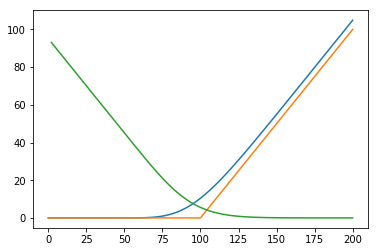

In [57]:
plt.plot(s, c)
plt.plot([0,100, 200], [0, 0, 100], '-')
plt.plot(s, p)

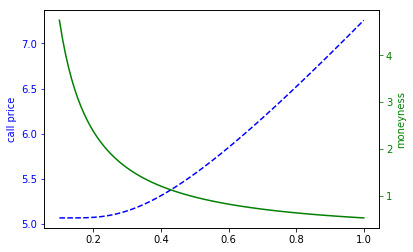

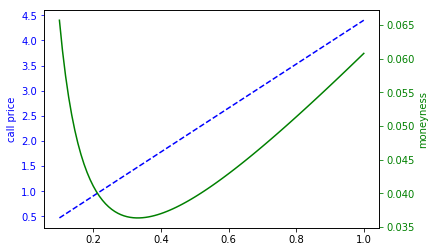

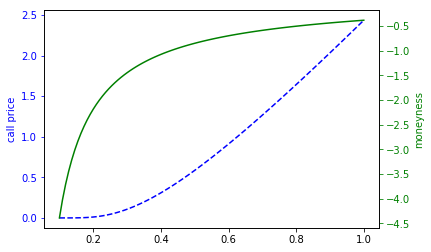

In [59]:
x =np.linspace(.1, 1, 100)
for k in [95, 100, 105]:
    m1 = moneyness(100.0, k, 0.055, x, 0.012)
    c1 = np.array([euroOptPrice(100, k, 0.055, xi, 0.012) for xi in x])
    fig, ax1 = plt.subplots()
    ax1.plot(x, c1[:,0], 'b--')
    ax1.set_ylabel('call price', color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.plot(x, m1, 'g-')
    ax2.set_ylabel('moneyness', color='g')
    ax2.tick_params('y', colors='g')

Text(0,0.5,'call or put price')

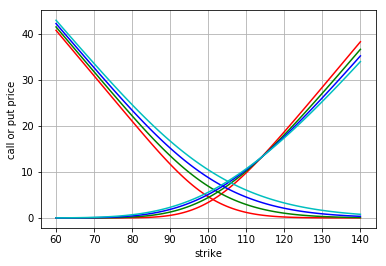

In [77]:
s = 100
kl = np.linspace(s-40, s+40, 101)
Tl = np.linspace(0.25, 1, 4)
# plt.plot([kl[0], sl[0], kl[-1]], [(sl[0]-kl[0]), 0, kl[-1]-sl[0]], '--')
cl=['r', 'g', 'b', 'c', 'y']
for i,T in enumerate(Tl):
    cp = np.array([euroOptPrice(s, ki, r=0.05, sig=0.2, T=T) for ki in kl])
    plt.plot(kl, cp[:,0], cl[i], label="call")
    plt.plot(kl, cp[:,1], cl[i], label="put")
plt.grid(True)
plt.xlabel("strike")
plt.ylabel('call or put price')